<a href="https://colab.research.google.com/github/sag005/CSE291-Text-Mining/blob/main/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from pandas.core.dtypes.dtypes import dtypes
import pandas as pd
from collections import defaultdict
df = pd.read_csv('nyt.csv', dtype = defaultdict(str), engine='python')

print(len(df))

df.head(10)

11519


,text,label
0,(reuters) - carlos tevez sealed his move to ju...,sports
1,if professional pride and strong defiance can ...,sports
2,"palermo, sicily — roberta vinci beat top-seede...",sports
3,spain's big two soccer teams face a pair of it...,sports
4,the argentine soccer club san lorenzo complete...,sports
5,bryce petty had to wait behind a heisman troph...,sports
6,paris — wild card gael monfils confirmed there...,sports
7,"crans-sur-sierre, switzerland — anirban lahiri...",sports
8,"miami — the first order of business, after the...",sports
9,a year's absence from the united states open h...,sports


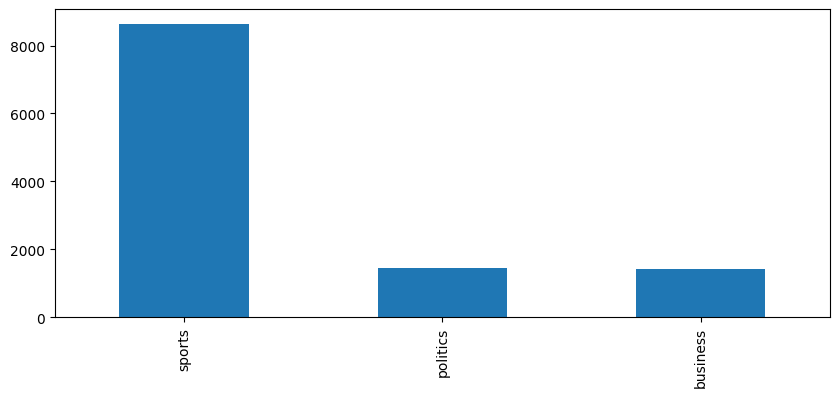

In [10]:
import matplotlib.pyplot as plt
my_tags = ['business', 'politics', 'sports']
plt.figure(figsize=(10,4))
df.label.value_counts().plot(kind='bar');

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True, stop_words='english')
corpus_list = df.text.to_list()

X_binary_fit = vectorizer.fit(corpus_list)
Xbinary_ = X_binary_fit.transform(corpus_list)
label_encoder = LabelEncoder()
label_list = df.label.to_numpy().reshape(-1,1)
y_binary_fit = label_encoder.fit(label_list)
ybinary_ = y_binary_fit.transform(label_list)

X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(Xbinary_, ybinary_, test_size=0.1, random_state=42)

X_binary_train, X_binary_val, y_binary_train, y_binary_val = train_test_split(X_binary_train, y_binary_train, test_size=0.11111, random_state=42)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

0.9809027777777778
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       144
           1       0.93      0.93      0.93       134
           2       1.00      1.00      1.00       874

    accuracy                           0.98      1152
   macro avg       0.96      0.95      0.95      1152
weighted avg       0.98      0.98      0.98      1152

0.9809027777777778
0.954210481094011


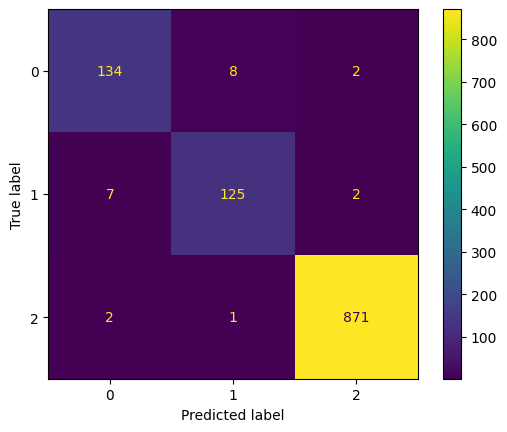

In [15]:
clf_binary_unbalanced = LogisticRegression().fit(X_binary_train, y_binary_train)
print(clf_binary_unbalanced.score(X_binary_val, y_binary_val))

cmbinary_ = metrics.confusion_matrix(y_binary_val, clf_binary_unbalanced.predict(X_binary_val))
ConfusionMatrixDisplay(confusion_matrix=cmbinary_).plot()
print(metrics.classification_report(y_binary_val, clf_binary_unbalanced.predict(X_binary_val)))

print(f1_score(y_binary_val, clf_binary_unbalanced.predict(X_binary_val), average='micro'))
print(f1_score(y_binary_val, clf_binary_unbalanced.predict(X_binary_val), average='macro'))

0.9800347222222222
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       144
           1       0.93      0.93      0.93       134
           2       1.00      0.99      1.00       874

    accuracy                           0.98      1152
   macro avg       0.95      0.95      0.95      1152
weighted avg       0.98      0.98      0.98      1152

0.9800347222222222
0.9530140612046601


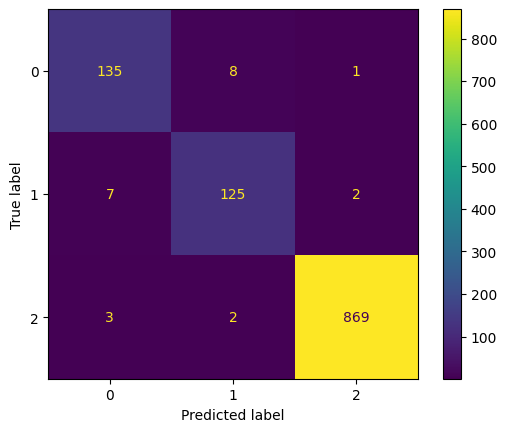

In [16]:
clf_binary_balanced = LogisticRegression(class_weight='balanced').fit(X_binary_train, y_binary_train)
print(clf_binary_balanced.score(X_binary_val, y_binary_val))

cmbinary_ = metrics.confusion_matrix(y_binary_val, clf_binary_balanced.predict(X_binary_val))
ConfusionMatrixDisplay(confusion_matrix=cmbinary_).plot()
print(metrics.classification_report(y_binary_val, clf_binary_balanced.predict(X_binary_val)))


print(f1_score(y_binary_val, clf_binary_balanced.predict(X_binary_val), average='micro'))
print(f1_score(y_binary_val, clf_binary_balanced.predict(X_binary_val), average='macro'))

0.9809027777777778
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       144
           1       0.92      0.93      0.93       134
           2       1.00      1.00      1.00       874

    accuracy                           0.98      1152
   macro avg       0.95      0.95      0.95      1152
weighted avg       0.98      0.98      0.98      1152

0.9809027777777778
0.9531854562365623


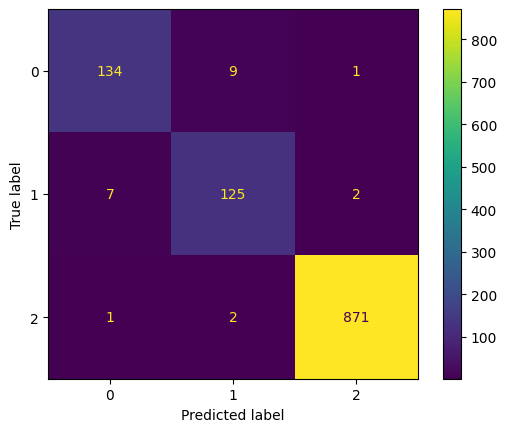

In [17]:
lmbinary_ = LogisticRegression(class_weight='balanced', multi_class='ovr', solver='liblinear').fit(X_binary_train, y_binary_train)
print(lmbinary_.score(X_binary_val, y_binary_val))

cmbinary_ = metrics.confusion_matrix(y_binary_val, lmbinary_.predict(X_binary_val))
ConfusionMatrixDisplay(confusion_matrix=cmbinary_).plot()
print(metrics.classification_report(y_binary_val, lmbinary_.predict(X_binary_val)))

print(f1_score(y_binary_val, lmbinary_.predict(X_binary_val), average='micro'))
print(f1_score(y_binary_val, lmbinary_.predict(X_binary_val), average='macro'))

0.9791666666666666
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       159
           1       0.93      0.93      0.93       162
           2       1.00      1.00      1.00       831

    accuracy                           0.98      1152
   macro avg       0.95      0.95      0.95      1152
weighted avg       0.98      0.98      0.98      1152

0.9791666666666666
0.9518240649163446


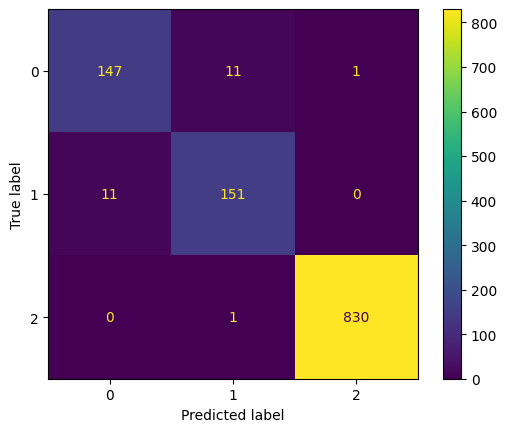

In [18]:
print(lmbinary_.score(X_binary_test, y_binary_test))
cmbinary_ = metrics.confusion_matrix(y_binary_test, lmbinary_.predict(X_binary_test))
ConfusionMatrixDisplay(confusion_matrix=cmbinary_).plot()
print(metrics.classification_report(y_binary_test, lmbinary_.predict(X_binary_test)))


print(f1_score(y_binary_test, lmbinary_.predict(X_binary_test), average='micro'))
print(f1_score(y_binary_test, lmbinary_.predict(X_binary_test), average='macro'))

## Q1 Part 2

In [19]:
vectorizer = CountVectorizer(stop_words='english')
corpus_list = df.text.to_list()

X_freq_fit = vectorizer.fit(corpus_list)
Xfreq_ = X_freq_fit.transform(corpus_list)
label_encoder = LabelEncoder()
label_list = df.label.to_numpy().reshape(-1,1)
y_freq_fit = label_encoder.fit(label_list)
yfreq_ = y_freq_fit.transform(label_list)

X_freq_train, X_freq_test, y_freq_train, y_freq_test = train_test_split(Xfreq_, yfreq_, test_size=0.1, random_state=42)

X_freq_train, X_freq_val, y_freq_train, y_freq_val = train_test_split(X_freq_train, y_freq_train, test_size=0.11111, random_state=42)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9861111111111112
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       144
           1       0.95      0.96      0.96       134
           2       1.00      1.00      1.00       874

    accuracy                           0.99      1152
   macro avg       0.97      0.97      0.97      1152
weighted avg       0.99      0.99      0.99      1152

0.9861111111111112
0.966688400054835


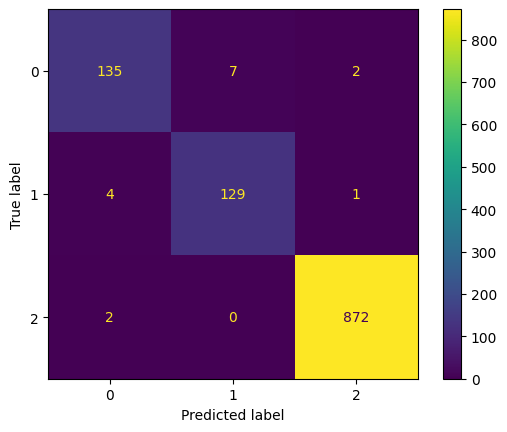

In [20]:
clf_freq_unbalanced = LogisticRegression().fit(X_freq_train, y_freq_train)
print(clf_freq_unbalanced.score(X_freq_val, y_freq_val))

cmfreq_ = metrics.confusion_matrix(y_freq_val, clf_freq_unbalanced.predict(X_freq_val))
ConfusionMatrixDisplay(confusion_matrix=cmfreq_).plot()
print(metrics.classification_report(y_freq_val, clf_freq_unbalanced.predict(X_freq_val)))


print(f1_score(y_freq_val, clf_freq_unbalanced.predict(X_freq_val), average='micro'))
print(f1_score(y_freq_val, clf_freq_unbalanced.predict(X_freq_val), average='macro'))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9852430555555556
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       144
           1       0.95      0.96      0.96       134
           2       1.00      1.00      1.00       874

    accuracy                           0.99      1152
   macro avg       0.97      0.97      0.97      1152
weighted avg       0.99      0.99      0.99      1152

0.9852430555555556
0.9653930017774411


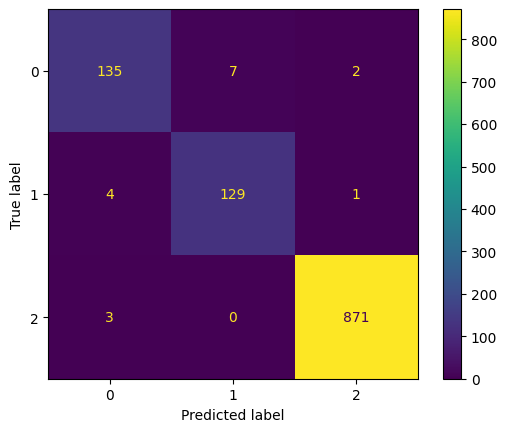

In [21]:
clf_freq_balanced = LogisticRegression(class_weight='balanced').fit(X_freq_train, y_freq_train)
print(clf_freq_balanced.score(X_freq_val, y_freq_val))

cmfreq_ = metrics.confusion_matrix(y_freq_val, clf_freq_balanced.predict(X_freq_val))
ConfusionMatrixDisplay(confusion_matrix=cmfreq_).plot()
print(metrics.classification_report(y_freq_val, clf_freq_balanced.predict(X_freq_val)))


print(f1_score(y_freq_val, clf_freq_balanced.predict(X_freq_val), average='micro'))
print(f1_score(y_freq_val, clf_freq_balanced.predict(X_freq_val), average='macro'))

0.9869791666666666
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       144
           1       0.94      0.96      0.95       134
           2       1.00      1.00      1.00       874

    accuracy                           0.99      1152
   macro avg       0.97      0.97      0.97      1152
weighted avg       0.99      0.99      0.99      1152

0.9869791666666666
0.9680423852293444


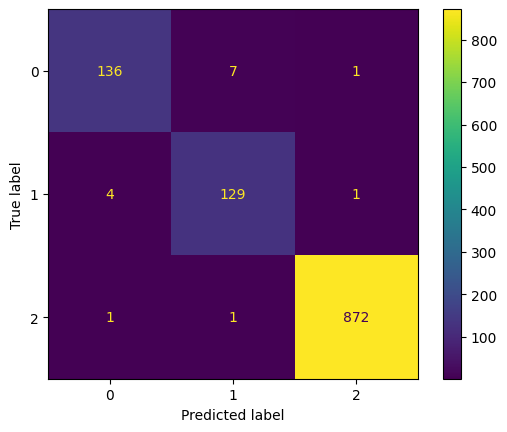

In [22]:
lmfreq_ = LogisticRegression(class_weight='balanced', multi_class='ovr', solver='liblinear').fit(X_freq_train, y_freq_train)
print(lmfreq_.score(X_freq_val, y_freq_val))

cmfreq_ = metrics.confusion_matrix(y_freq_val, lmfreq_.predict(X_freq_val))
ConfusionMatrixDisplay(confusion_matrix=cmfreq_).plot()
print(metrics.classification_report(y_freq_val, lmfreq_.predict(X_freq_val)))


print(f1_score(y_freq_val, lmfreq_.predict(X_freq_val), average='micro'))
print(f1_score(y_freq_val, lmfreq_.predict(X_freq_val), average='macro'))

0.984375
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       162
           2       1.00      1.00      1.00       831

    accuracy                           0.98      1152
   macro avg       0.96      0.96      0.96      1152
weighted avg       0.98      0.98      0.98      1152

0.984375
0.9642925424834395


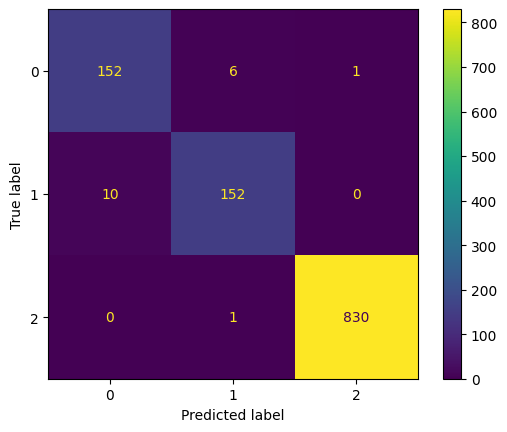

In [23]:
print(lmfreq_.score(X_freq_test, y_freq_test))
cmfreq_ = metrics.confusion_matrix(y_freq_test, lmfreq_.predict(X_freq_test))
ConfusionMatrixDisplay(confusion_matrix=cmfreq_).plot()
print(metrics.classification_report(y_freq_test, lmfreq_.predict(X_freq_test)))


print(f1_score(y_freq_test, lmfreq_.predict(X_freq_test), average='micro'))
print(f1_score(y_freq_test, lmfreq_.predict(X_freq_test), average='macro'))

## Q1 Part 3

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = vectorizer = TfidfVectorizer(stop_words='english')
corpus_list = df.text.to_list()

X_tfidf_fit = vectorizer.fit(corpus_list)
Xtfidf_ = X_tfidf_fit.transform(corpus_list)
label_encoder = LabelEncoder()
label_list = df.label.to_numpy().reshape(-1,1)
y_tfidf_fit = label_encoder.fit(label_list)
ytfidf_ = y_tfidf_fit.transform(label_list)

X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(Xtfidf_, ytfidf_, test_size=0.1, random_state=42)

X_tfidf_train, X_tfidf_val, y_tfidf_train, y_tfidf_val = train_test_split(X_tfidf_train, y_tfidf_train, test_size=0.11111, random_state=42)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0.9826388888888888
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       144
           1       0.94      0.96      0.95       134
           2       0.99      1.00      0.99       874

    accuracy                           0.98      1152
   macro avg       0.97      0.96      0.96      1152
weighted avg       0.98      0.98      0.98      1152

0.9826388888888888
0.9619009323128628


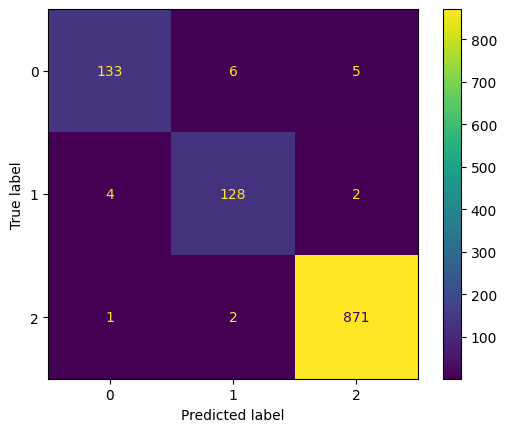

In [25]:
clf_tfidf_unbalanced = LogisticRegression().fit(X_tfidf_train, y_tfidf_train)
print(clf_tfidf_unbalanced.score(X_tfidf_val, y_tfidf_val))

cmtfidf_ = metrics.confusion_matrix(y_tfidf_val, clf_tfidf_unbalanced.predict(X_tfidf_val))
ConfusionMatrixDisplay(confusion_matrix=cmtfidf_).plot()
print(metrics.classification_report(y_tfidf_val, clf_tfidf_unbalanced.predict(X_tfidf_val)))



print(f1_score(y_tfidf_val, clf_tfidf_unbalanced.predict(X_tfidf_val), average='micro'))
print(f1_score(y_tfidf_val, clf_tfidf_unbalanced.predict(X_tfidf_val), average='macro'))

0.984375
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       144
           1       0.92      0.97      0.95       134
           2       1.00      0.99      1.00       874

    accuracy                           0.98      1152
   macro avg       0.96      0.97      0.97      1152
weighted avg       0.98      0.98      0.98      1152

0.984375
0.9651886519014296


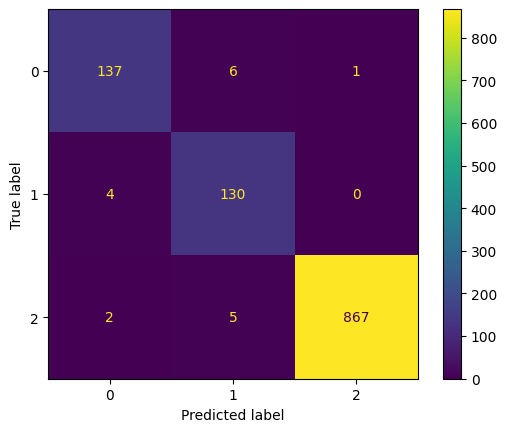

In [26]:
clf_tfidf_balanced = LogisticRegression(class_weight='balanced').fit(X_tfidf_train, y_tfidf_train)
print(clf_tfidf_balanced.score(X_tfidf_val, y_tfidf_val))

cmtfidf_ = metrics.confusion_matrix(y_tfidf_val, clf_tfidf_balanced.predict(X_tfidf_val))
ConfusionMatrixDisplay(confusion_matrix=cmtfidf_).plot()
print(metrics.classification_report(y_tfidf_val, clf_tfidf_balanced.predict(X_tfidf_val)))



print(f1_score(y_tfidf_val, clf_tfidf_balanced.predict(X_tfidf_val), average='micro'))
print(f1_score(y_tfidf_val, clf_tfidf_balanced.predict(X_tfidf_val), average='macro'))

0.9835069444444444
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       144
           1       0.94      0.96      0.95       134
           2       0.99      1.00      0.99       874

    accuracy                           0.98      1152
   macro avg       0.96      0.96      0.96      1152
weighted avg       0.98      0.98      0.98      1152

0.9835069444444444
0.963515231509187


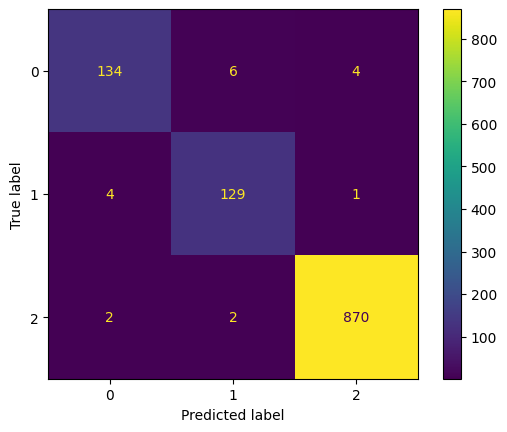

In [27]:
lmtfidf_ = LogisticRegression(class_weight='balanced', multi_class='ovr', solver='liblinear').fit(X_tfidf_train, y_tfidf_train)
print(lmtfidf_.score(X_tfidf_val, y_tfidf_val))

cmtfidf_ = metrics.confusion_matrix(y_tfidf_val, lmtfidf_.predict(X_tfidf_val))
ConfusionMatrixDisplay(confusion_matrix=cmtfidf_).plot()
print(metrics.classification_report(y_tfidf_val, lmtfidf_.predict(X_tfidf_val)))



print(f1_score(y_tfidf_val, lmtfidf_.predict(X_tfidf_val), average='micro'))
print(f1_score(y_tfidf_val, lmtfidf_.predict(X_tfidf_val), average='macro'))

0.9765625
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       159
           1       0.92      0.93      0.93       162
           2       1.00      1.00      1.00       831

    accuracy                           0.98      1152
   macro avg       0.95      0.95      0.95      1152
weighted avg       0.98      0.98      0.98      1152

0.9765625
0.9472317160722229


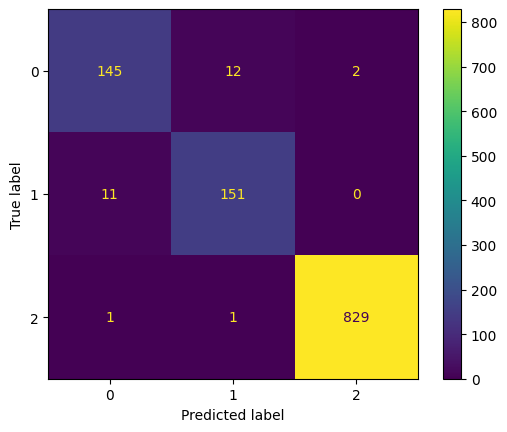

In [28]:
print(lmtfidf_.score(X_tfidf_test, y_tfidf_test))
cmtfidf_ = metrics.confusion_matrix(y_tfidf_test, lmtfidf_.predict(X_tfidf_test))
ConfusionMatrixDisplay(confusion_matrix=cmtfidf_).plot()
print(metrics.classification_report(y_tfidf_test, lmtfidf_.predict(X_tfidf_test)))


print(f1_score(y_tfidf_test, lmtfidf_.predict(X_tfidf_test), average='micro'))
print(f1_score(y_tfidf_test, lmtfidf_.predict(X_tfidf_test), average='macro'))